# Task 3

## Exploratory Data Analysis - Retail

### Finding the weak areas where we can work to make more profit. 


### Importing revelant modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Reading the data

In [2]:
data=pd.read_csv('C:\\Users\\adity\\OneDrive\\Documents\\Python Scripts\\SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### Information about the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### Removing the duplicate entries

In [5]:
data.duplicated().sum()

17

In [6]:
data.drop_duplicates(inplace=True)

### Removing the postal code as it is not giving us any vital information

In [7]:
data=data.drop(['Postal Code'],axis=1)

### Description of the data

In [8]:
data.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


## Data Visualization

### Ship Mode

In [9]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

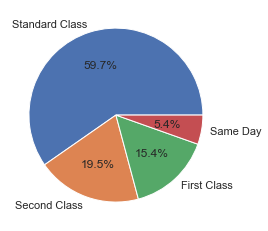

In [10]:
plt.pie(data['Ship Mode'].value_counts(),labels=data['Ship Mode'].value_counts().index,autopct='%1.1f%%')
plt.show()

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

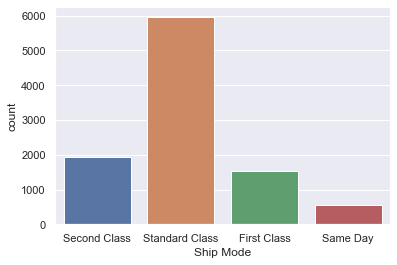

In [11]:
sns.countplot(data['Ship Mode'])

### Segment

In [12]:
data['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

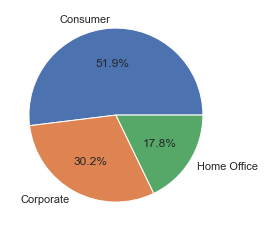

In [13]:
plt.pie(data['Segment'].value_counts(),labels=data['Segment'].value_counts().index,autopct='%1.1f%%')
plt.show()

### Category

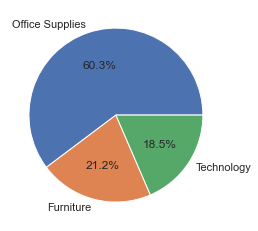

In [14]:
plt.pie(data['Category'].value_counts(),labels=data['Category'].value_counts().index,autopct='%1.1f%%')
plt.show()

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

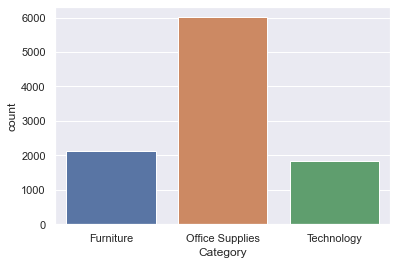

In [15]:
sns.countplot(data['Category'])

### Sub Category

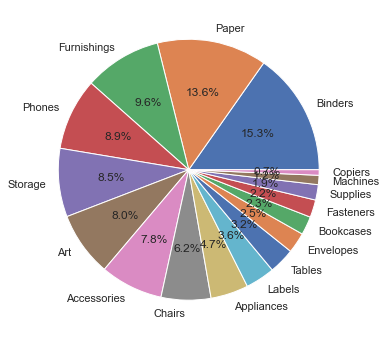

In [16]:
plt.figure(figsize=(6,6))
plt.pie(data['Sub-Category'].value_counts(),labels=data['Sub-Category'].value_counts().index,autopct='%1.1f%%')
plt.show()

C:\Users\adity\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


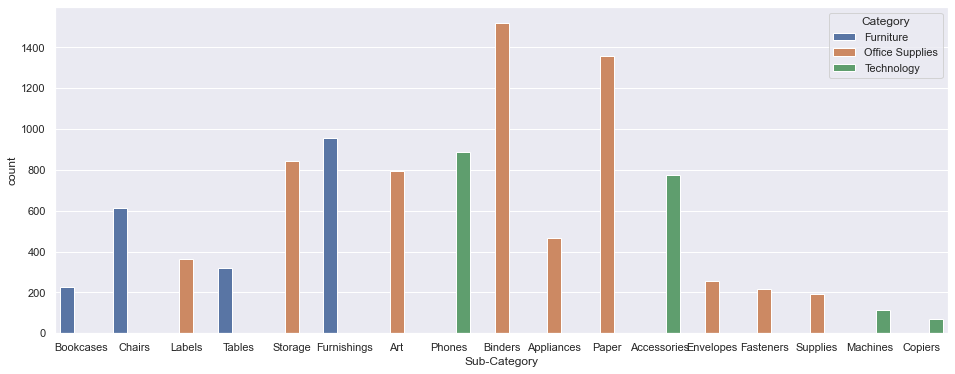

In [17]:
plt.figure(figsize=(16,6))
sns.countplot(data['Sub-Category'],hue=data['Category'])
plt.show()

### Region wise

<ipython-input-18-bddacf5869c3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  st=data.groupby(['Region'])['Profit','Sales'].sum().sort_values(by='Sales')


<AxesSubplot:xlabel='Region'>

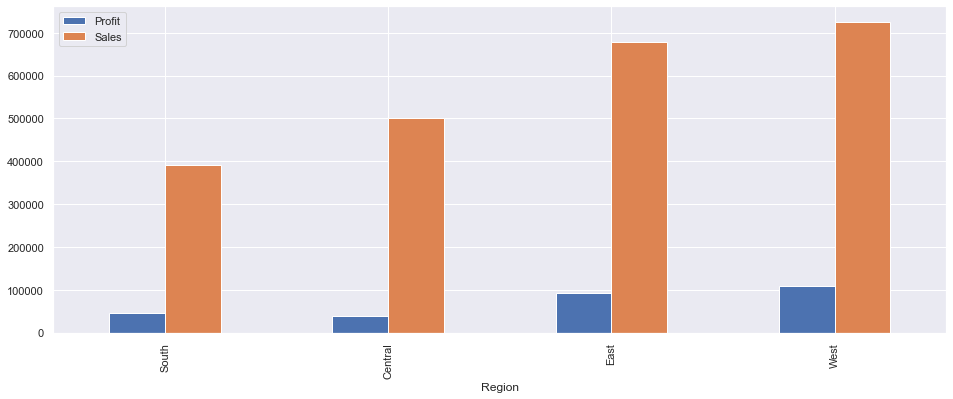

In [18]:
st=data.groupby(['Region'])['Profit','Sales'].sum().sort_values(by='Sales')
st.plot.bar(figsize=(16,6))

## Comparing Sales and Profit/Lose against Discount

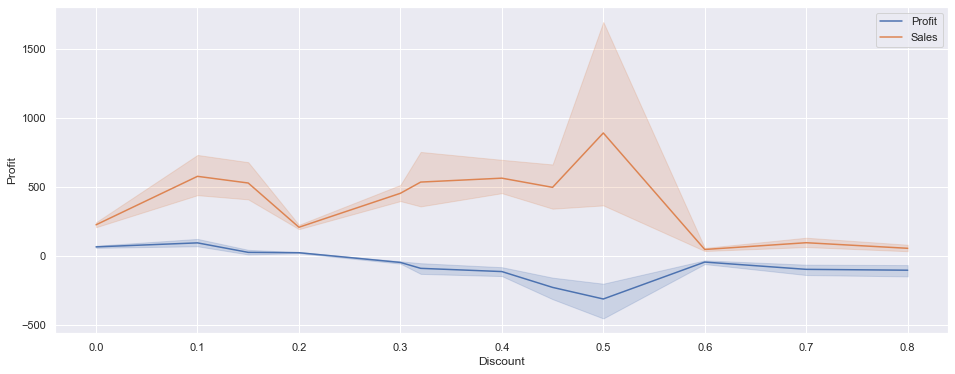

In [19]:
plt.figure(figsize=(16,6))
sns.lineplot(x=data['Discount'],y=data['Profit'],label='Profit')
sns.lineplot(x=data['Discount'],y=data['Sales'],label='Sales')
plt.show()

## Top 10 Performing Cities

In [20]:
top=data.sort_values(by='Profit',ascending=False).head(10)
top

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
6826,Standard Class,Corporate,United States,Lafayette,Indiana,Central,Technology,Copiers,17499.950,5,0.0,8399.9760
8153,First Class,Consumer,United States,Seattle,Washington,West,Technology,Copiers,13999.960,4,0.0,6719.9808
4190,Standard Class,Consumer,United States,Newark,Delaware,East,Technology,Copiers,10499.970,3,0.0,5039.9856
9039,Standard Class,Consumer,United States,Detroit,Michigan,Central,Office Supplies,Binders,9892.740,13,0.0,4946.3700
4098,Standard Class,Consumer,United States,Minneapolis,Minnesota,Central,Office Supplies,Binders,9449.950,5,0.0,4630.4755
2623,First Class,Home Office,United States,New York City,New York,East,Technology,Copiers,11199.968,4,0.2,3919.9888
509,Standard Class,Consumer,United States,Atlanta,Georgia,South,Office Supplies,Binders,6354.950,5,0.0,3177.4750
8488,Second Class,Consumer,United States,Arlington,Virginia,South,Technology,Machines,8749.950,5,0.0,2799.9840
7666,Standard Class,Home Office,United States,Providence,Rhode Island,East,Technology,Copiers,5399.910,9,0.0,2591.9568
6520,Second Class,Consumer,United States,Jackson,Michigan,Central,Office Supplies,Binders,5443.960,4,0.0,2504.2216


## Profit/Lose and Sales of each State

<ipython-input-21-012d081852df>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  st=data.groupby(['State'])['Profit','Sales'].sum().sort_values(by='Profit',ascending=False)


<AxesSubplot:ylabel='State'>

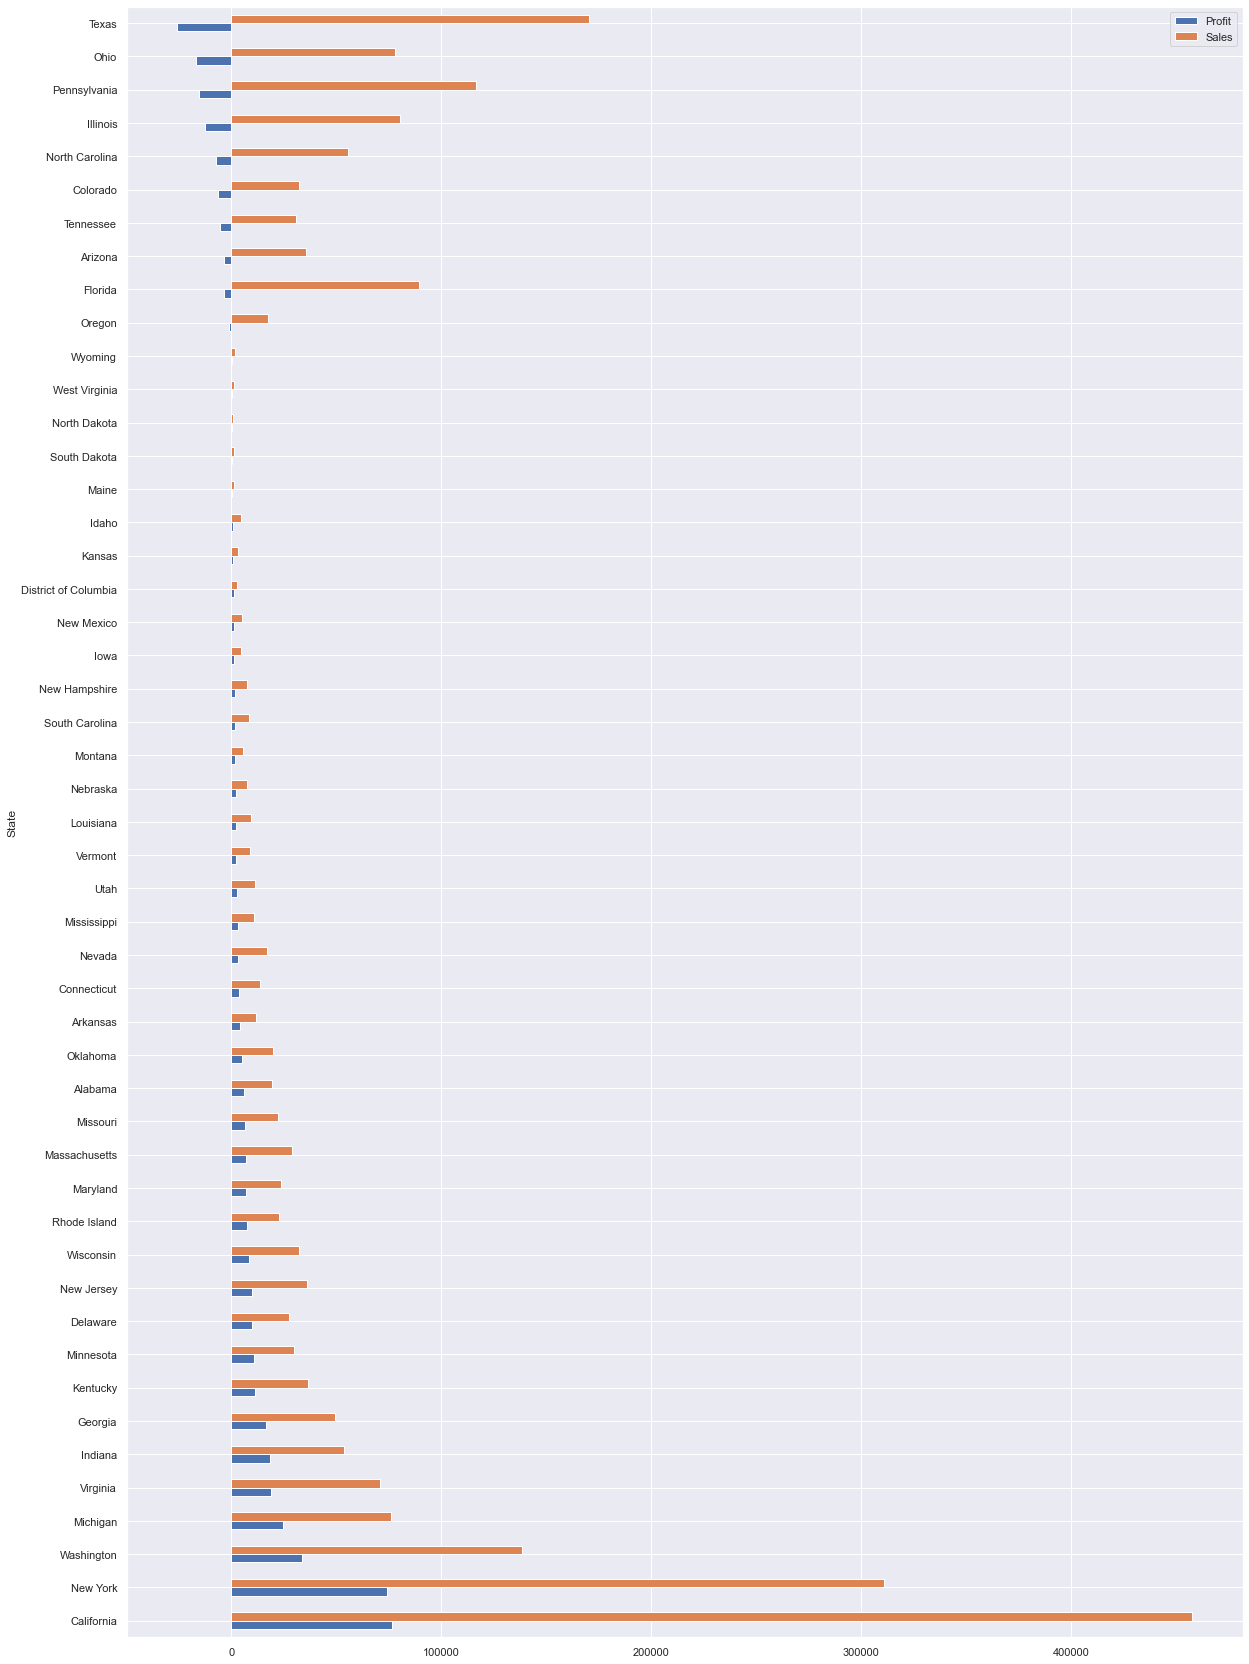

In [21]:
st=data.groupby(['State'])['Profit','Sales'].sum().sort_values(by='Profit',ascending=False)
st.plot.barh(figsize=(20,30))

## Profit/Lose and Sales of each Sub-Category

<ipython-input-22-41f506f40201>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  st=data.groupby(['Sub-Category'])['Profit','Sales'].sum().sort_values(by='Profit',ascending=True)


<AxesSubplot:xlabel='Sub-Category'>

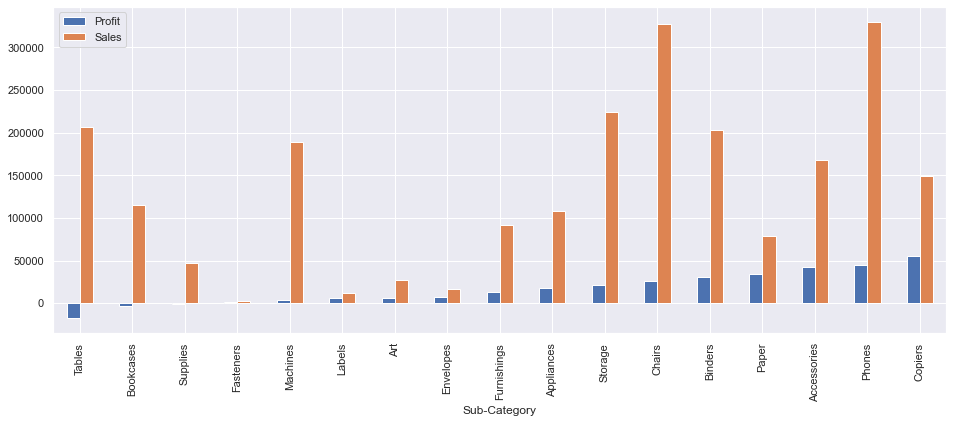

In [22]:
st=data.groupby(['Sub-Category'])['Profit','Sales'].sum().sort_values(by='Profit',ascending=True)
st.plot.bar(figsize=(16,6))

## Conclusion
### 1) Copiers and phones has the most profit so we can focus more on copiers and phones
### 2) Tables and Bookcases put the company into a loss so we can decrease the sales of these Sub Category
### 3) Carolina and New York are the best performing states so we can foucs on those
### 4) Texas, Ohio and Pennysylvania are the worst performing states so we can decrease the sales of these states
### 5) Discount above 0.2 or 20% is putting the company in loss no matter how much is the sale, therefore a maximum of 15% Discount should be given by all stores over the country